# PERFORMANCE EVALUATION

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import sklearn.metrics
import re
import h5py
import matplotlib.pyplot as plt

/Users/mac/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
with h5py.File('data.h5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    data = hf.get('label')
    np_data = np.array(data)
    print('Shape of the array dataset_1: \n', np_data.shape)
#print len(lines)

('List of arrays in this file: \n', [u'data', u'label'])
('Shape of the array dataset_1: \n', (2600, 2, 1, 1))


true label of testset

In [10]:
rainNum = 1000
label = np.zeros(2600, dtype=np.int)
label[1399:2600] = 1
print label[1400:2600]

[1 1 1 ..., 1 1 1]


compute ROC curve

In [12]:
from sklearn.metrics import roc_curve, auc
scores = np.asarray(np_data)
fpr, tpr, thresholds = roc_curve(label, scores, pos_label=1)
roc_auc = auc(fpr, tpr)

ValueError: bad input shape (2600, 2, 1, 1)

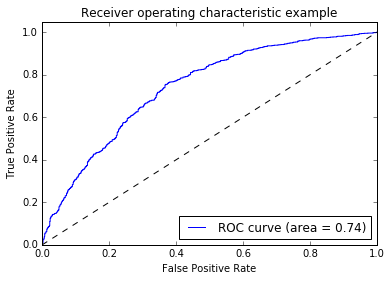

In [5]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [6]:
pos = np.where(tpr==0.45)
print thresholds[pos]
#np.where(thresholds==5.15491720e-01)

[ 0.98778433  0.98771346]


In [9]:
#f = open('/Users/jillwang/Downloads/pre-label-newnew.txt', "r")
#pre = [x.strip('\n') for x in f.readlines()]
#f.close()
#pred = np.asarray(pre)
#pred = [int(x) for x in pre]
#print len(pred)

pred = np.ones((len(lines)), dtype=np.int)
index = [i for i in range(len(lines)) if scores[i]<0.5]
pred[index] = 0
print len(pred)
preNum = len(pred)
pred = pred[0:preNum]

1799


In [10]:
from sklearn.metrics import classification_report
target_names = ['norain', 'rain']
print(classification_report(label, pred, target_names=target_names))

             precision    recall  f1-score   support

     norain       0.71      0.51      0.59       799
       rain       0.68      0.83      0.75      1000

avg / total       0.69      0.69      0.68      1799

